<a href="https://www.kaggle.com/code/vijays140291/carinsurance-prediction?scriptVersionId=122729487" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [150]:
#importing library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

# Predicting Car Insurance Cold Calls
* Whether person will buy car insurance or not

# Loading the Dataset

In [151]:
df=pd.read_csv('/kaggle/input/carinsurance/carInsurance_train.csv')
#showing the  dataset
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


1. How many People who have CarLoan Bought Car Insurance?

In [174]:
df[df['CarLoan']==df['CarInsurance']][df['CarLoan']==1]['CarLoan'].value_counts()

1    152
Name: CarLoan, dtype: int64

# Checking Label column distribution

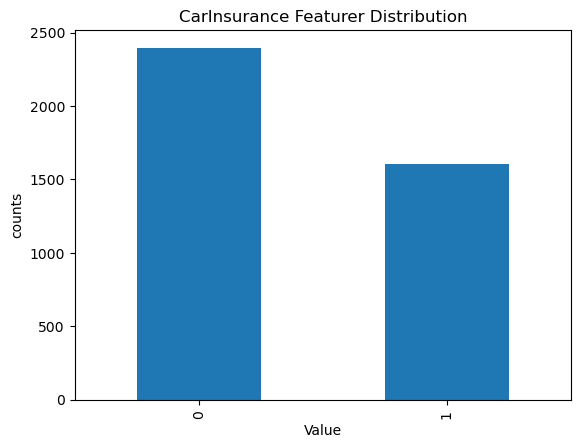

In [153]:
df['CarInsurance'].value_counts().plot(kind='bar')
plt.title('CarInsurance Featurer Distribution')
plt.xlabel('Value')
plt.ylabel('counts')
plt.show()

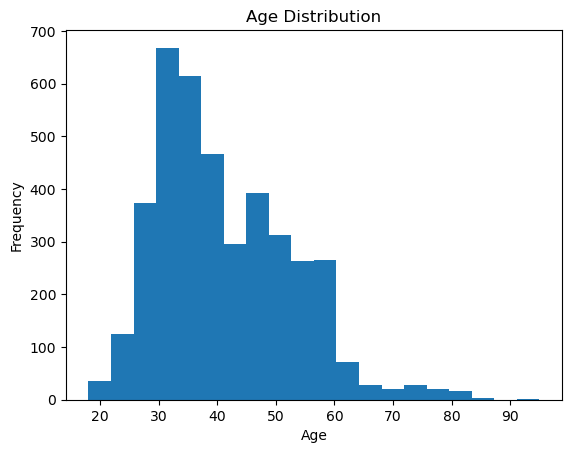

In [154]:
df['Age'].plot(kind='hist',bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

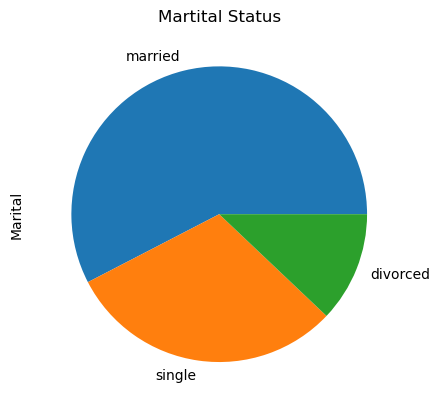

In [155]:
df['Marital'].value_counts().plot(kind='pie')
plt.title('Martital Status')
plt.show()

# Checking for Missing Values

In [156]:
df.isna().mean()

Id                  0.00000
Age                 0.00000
Job                 0.00475
Marital             0.00000
Education           0.04225
Default             0.00000
Balance             0.00000
HHInsurance         0.00000
CarLoan             0.00000
Communication       0.22550
LastContactDay      0.00000
LastContactMonth    0.00000
NoOfContacts        0.00000
DaysPassed          0.00000
PrevAttempts        0.00000
Outcome             0.76050
CallStart           0.00000
CallEnd             0.00000
CarInsurance        0.00000
dtype: float64

# Getting Preliminar Information about the Dataset

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [158]:
df['Communication'].mode()[0]

'cellular'

# Preprocessing Function

In [159]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [160]:
df['LastContactMonth'].unique()

array(['jan', 'may', 'jun', 'mar', 'nov', 'jul', 'aug', 'sep', 'apr',
       'feb', 'oct', 'dec'], dtype=object)

In [161]:
def preprocess_inputs(df):
    df=df.copy()
    #dropping the id column from the dataset
    df=df.drop('Id',axis=1)
    #Dropping the outcome column because too many missing values
    df=df.drop('Outcome',axis=1)
    missing_columns=['Education','Job','Communication']
    for column in missing_columns:
        df[column]=df[column].fillna(df[column].mode()[0])
    month_replace={'jan':0, 'may':4, 'jun':5, 'mar':2, 'nov':10, 'jul':6, 'aug':7, 'sep':8, 'apr':3,
       'feb':1, 'oct':9, 'dec':11}
    df['LastContactMonth']=df['LastContactMonth'].replace(month_replace)
    df['callstart_hour']=pd.to_datetime(df['CallStart']).dt.hour
    df['callstart_minues']=pd.to_datetime(df['CallStart']).dt.minute
    df['callstart_second']=pd.to_datetime(df['CallStart']).dt.second
    df['callend_hour']=pd.to_datetime(df['CallEnd']).dt.hour
    df['callend_minues']=pd.to_datetime(df['CallEnd']).dt.minute
    df['callend_second']=pd.to_datetime(df['CallEnd']).dt.second
    
    #dropping the CallStart and CallEnd Column
    df=df.drop(['CallStart','CallEnd'],axis=1)
    
    communication_replace={'telephone':0,'cellular':1}
    df['Communication']=df['Communication'].replace(communication_replace)
    #replacing Education column
    df['Education']=df['Education'].replace({'primary':0,'secondary':1,'tertiary':2})
    #replacing marital column
    df['Marital']=df['Marital'].replace({'single':0,'married':1,'divorced':2})
    
    df=onehot_encode(df,'Job')
    
    #splitting between target and feature column
    
    y=df['CarInsurance']
    x=df.drop('CarInsurance',axis=1)
    
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    #scaling the dataset
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    return x_train,x_test,y_train,y_test

In [162]:
x.isna().sum().sum()

0

In [163]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2800, 30)
(1200, 30)
(2800,)
(1200,)


# Training the Model

In [164]:
models={'Logistic Regression':LogisticRegression(),
      'K-Near Neighbors':KNeighborsClassifier(),
      'Decision Tree':DecisionTreeClassifier(),
      'Support Vector Machine(Linear Kernel)':LinearSVC(),
      'Support Vector Machine':SVC(),
      'Neural Netork':MLPClassifier(),
      'Random Forest':RandomForestClassifier(),
      'Gradient Boosting':GradientBoostingClassifier()}

In [165]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name)
    print(model.score(x_test,y_test))

Logistic Regression
0.7158333333333333
K-Near Neighbors
0.6283333333333333
Decision Tree
0.6341666666666667
Support Vector Machine(Linear Kernel)
0.7683333333333333
Support Vector Machine
0.6908333333333333
Neural Netork
0.7333333333333333
Random Forest
0.7216666666666667
Gradient Boosting
0.7416666666666667


# Support Vector Machine (Linear Kernel)

In [166]:
sv_model=LinearSVC()
sv_model.fit(x_train,y_train)
sv_model.score(x_test,y_test)

0.7683333333333333

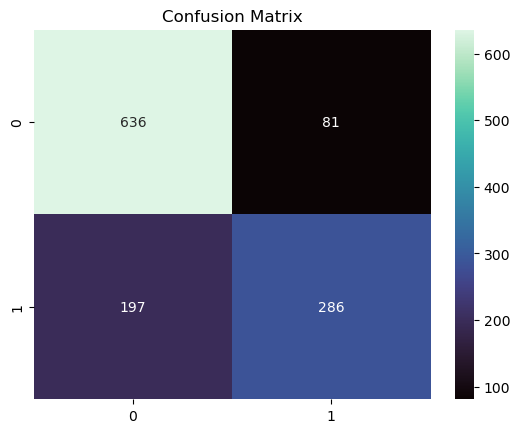

In [167]:
y_pred=sv_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako',fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [177]:
y_test.value_counts()

0    717
1    483
Name: CarInsurance, dtype: int64

# Classification Report

In [168]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       717
           1       0.78      0.59      0.67       483

    accuracy                           0.77      1200
   macro avg       0.77      0.74      0.75      1200
weighted avg       0.77      0.77      0.76      1200



In [169]:
y_train

1262    1
1770    0
3025    0
500     1
130     0
       ..
285     1
3361    0
3359    0
9       0
1542    0
Name: CarInsurance, Length: 2800, dtype: int64

In [170]:
pd.to_datetime(df['CallStart'])

0      2023-03-20 13:45:20
1      2023-03-20 14:49:03
2      2023-03-20 16:30:24
3      2023-03-20 12:06:43
4      2023-03-20 14:35:44
               ...        
3995   2023-03-20 17:46:28
3996   2023-03-20 14:49:16
3997   2023-03-20 12:19:03
3998   2023-03-20 11:27:35
3999   2023-03-20 13:31:48
Name: CallStart, Length: 4000, dtype: datetime64[ns]

# Checking the Length of the Categorical Column

In [171]:
{column:len(df[column].unique()) for column in df.select_dtypes('object')}

{'Job': 12,
 'Marital': 3,
 'Education': 4,
 'Communication': 3,
 'LastContactMonth': 12,
 'Outcome': 4,
 'CallStart': 3777,
 'CallEnd': 3764}